In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### RIDGE/L2 REGRESSION

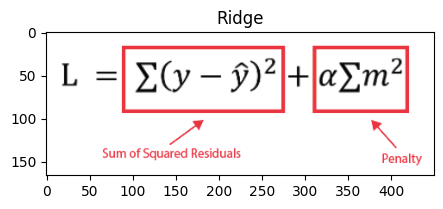

In [53]:
# Load image

plt.figure(figsize= (5,6))
mi = img.imread(r'ridge.png')
plt.title('Ridge')
plt.imshow(mi);

### Ridge from scratch OLS (Ordinary Least Squares)

In [62]:
class MultiLinearRidge:
    '''
    This class consist of the init method for the initilization, fit method to learn parameters and a predict method to predict for the unseen data
    '''

    def __init__(self, lambdaa = 0.05):
        self.slope = None
        self.intercept = None
        self.lambdaa = lambdaa

    def fit(self, X_train, y_train):
        '''
        Input: Independent variables and a dependent variable
        Output: Learn parameter slope and intercept
        '''
        X_train = np.insert(X_train, 0, 1, axis= 1) # to add a column for the intercept b0 with value 1

        I = np.identity(X_train.shape[1])
        I[0][0] = 0 # Assign 0 to intercept/b0 because we want to penaltize weights not intercept and 1st column is of b0/intercept.
        # calculate the coefficient/slope
        bita = np.linalg.inv(np.dot(X_train.T,X_train)+(self.lambdaa * I)).dot(X_train.T).dot(y_train) # bita(b) = (inverse of((x.transpose * X)+(lambda*identity_matrix)) * x.transpose * y)
        
        self.intercept = bita[0] # updating intercept
        self.slope = bita[1:] # updating coefficient/slope

        return f'The intercept is {self.intercept}, \nSlope/Coefficient is {self.slope}'

    def predict(self, X_test):
        '''
        Input: Unseen data
        Output: Prediction
        '''
        prediction = np.dot(X_test, self.slope) + self.intercept

        return prediction

In [63]:
data1 = pd.DataFrame({'x1': [1,2,3,1,2,2]})
target1 = np.array([25,17,11,4,6,5])

In [64]:
ridge = MultiLinearRidge()
ridge

In [65]:
print(ridge.fit(data1,target1))

The intercept is 15.572254335260117, 
Slope/Coefficient is [-2.31213873]


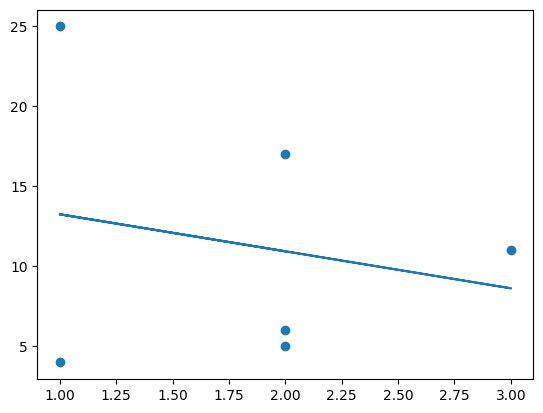

In [66]:
plt.scatter(data1, target1)
plt.plot(data1, ridge.predict(data1))
plt.show();

#### Checking output by sklearn ridge

In [67]:
r1 = Ridge(alpha= 0.05)
r1

Ridge(alpha=0.05)

In [68]:
r1.fit(data1,target1)

Ridge(alpha=0.05)

In [69]:
r1.coef_, r1.intercept_

(array([-2.31213873]), np.float64(15.572254335260117))

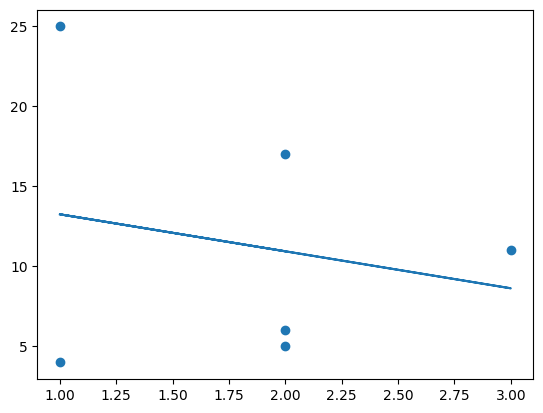

In [70]:
plt.scatter(data1, target1)
plt.plot(data1, r1.predict(data1))
plt.show();

#### Example by OLS and Ridge

`We will try to find if ridge pentalize the weights i.e, reduce the weights compared to normal linear regression.`

#### OLS and Ridge derivations
ols = (X.T * Y) * inv(X.T * X) <br>
ridge = inv((X.T * X) + (lambda * I)) * (X.T * Y)

In [71]:
# create sample dataset of 2 features and 3 observations

X = np.array([[1 , 2], [2, 3], [3,4]])
y = np.array([5, 7, 9])

In [72]:
# Initilize the parameters

penalty_controller = 1 # lambda
X_update = np.insert(X, 0, 1, axis= 1) # Adding b0 intercept
I = np.identity(X_update.shape[1])
I[0][0] = 0 # updating b0/intercept value to 0

#### Step by step OLS

In [73]:
# calculate (X.T * Y) for ols

xty = np.dot(X.T,y)
xty

array([46, 67])

In [74]:
# calculate (X.T * X) for ols

xtx = np.dot(X.T,X)
xtx

array([[14, 20],
       [20, 29]])

In [75]:
# calculate inv(X.T * X) for ols

xtxinv = np.linalg.inv(xtx)
xtxinv

array([[ 4.83333333, -3.33333333],
       [-3.33333333,  2.33333333]])

In [76]:
# calculate (X.T * Y) * inv(X.T * X) for ols

xtyxtxinv = np.dot(xtxinv, xty)
xtyxtxinv

array([-1.,  3.])

#### Step by step Ridge

In [77]:
# calculate (X.T * Y) for ridge

xty1 = np.dot(X_update.T,y)
xty1

array([21, 46, 67])

In [78]:
# calculate (X.T * X) for ridge

xtx1 = np.dot(X_update.T,X_update)
xtx1

array([[ 3,  6,  9],
       [ 6, 14, 20],
       [ 9, 20, 29]])

In [79]:
# calculate (X.T * X) + (lambda * I) for ridge

xtxli = xtx1 + (penalty_controller * I)
xtxli

array([[ 3.,  6.,  9.],
       [ 6., 15., 20.],
       [ 9., 20., 30.]])

In [80]:
# calculate inv((X.T * X) + (lambda * I)) for ridge

xtxliinv = np.linalg.inv(xtxli)
xtxliinv

array([[ 3.33333333e+00, -1.13489465e-15, -1.00000000e+00],
       [ 0.00000000e+00,  6.00000000e-01, -4.00000000e-01],
       [-1.00000000e+00, -4.00000000e-01,  6.00000000e-01]])

In [81]:
# calculate inv((X.T * X) + (lambda * I)) * (X.T * Y) for ridge

xtxlixty = np.dot(xtxliinv, xty1)
xtxlixty

array([3. , 0.8, 0.8])

#### OLS and Ridge directly through their derivations

In [82]:
# calculate bita derivatives of ols and ridge
# ols = (X.T * Y) * inv(X.T * X)
# ridge = inv((X.T * X) + (lambda * I)) * (X.T * Y)

ols_bita = (np.dot(X.T,y)).dot(np.linalg.inv(np.dot(X.T,X)))
ridge_bita = (np.linalg.inv(np.dot(X_update.T,X_update) + (penalty_controller * I))).dot(np.dot(X_update.T, y))
ols_bita, ridge_bita

(array([-1.,  3.]), array([3. , 0.8, 0.8]))

`We can clearly see ridge is penaltizing the weights. Ridge reduces the weights towards zero but never make them exact zero.`

### Ridge from scratch Gradient Descent

In [83]:
# Create class for ridge regression using gradient descent

class RidgeRegressionGD:
    '''
    Class contains initilization method, fit method and prediction method
    '''
    def __init__(self, learning_rate=0.01, epochs=100, lambda_=1.0):
        '''
        INPUT: Take learning_rate, epochs, lambda_
        '''
        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.lambda_ = lambda_
       
    def fit(self, X_train, y_train):
        '''
        INPUT: Take training data (Independent and dependant data)
        OUTPUT: Print coeff and intercept on every 10 iteration
        '''
        X_train = np.insert(X_train, 0, 1, axis= 1) # to add a column for the intercept b0 with value 1
        m, n = X_train.shape
        self.coef_ = np.ones(n)
       
        for i in range(self.epochs):
            # Compute gradients with Ridge penalty
            coef_der = -2 * (np.dot(y_train.T,X_train) - np.dot(X_train.T,X_train).dot(self.coef_) - self.lambda_*self.coef_)
           
            # Update weights
            self.coef_ = self.coef_ - (self.lr * coef_der)
           
            # Print loss every 100 epochs
            if i % 10 == 0:
                loss = np.mean((y_train - np.dot(X_train, self.coef_)) ** 2) + self.lambda_ * np.sum(self.coef_ ** 2)
                print(f"Epoch {i}: Loss={loss:.4f}, Coefs={self.coef_}")
   
    def predict(self, X_test):
        '''
        INPUT: Takes Test data
        OUTPUT: Return predictions
        '''
        return np.dot(X_test, self.coef_[1:]) + self.coef_[0] # mx+b

In [84]:
# Create data

data = pd.DataFrame({'x1': [1,2,3,1,2,2], 'x2': [4,3,1,1,2,1]})
target = np.array([25,17,11,4,6,5])

In [85]:
# Create instance for the class

rgd = RidgeRegressionGD()
rgd

In [86]:
# calling the method fit

rgd.fit(data,target)

Epoch 0: Loss=42.8323, Coefs=[1.76 2.26 3.36]
Epoch 10: Loss=36.0086, Coefs=[0.94710605 0.61740136 4.74361959]
Epoch 20: Loss=37.3817, Coefs=[0.5692201  0.44969993 5.04645778]
Epoch 30: Loss=37.8002, Coefs=[0.31057401 0.48772868 5.12946229]
Epoch 40: Loss=38.0419, Coefs=[0.11693466 0.54514846 5.1680622 ]
Epoch 50: Loss=38.2561, Coefs=[-0.03118254  0.59408334  5.19351033]
Epoch 60: Loss=38.4513, Coefs=[-0.14502418  0.63254419  5.21237836]
Epoch 70: Loss=38.6217, Coefs=[-0.23261427  0.66227946  5.22677888]
Epoch 80: Loss=38.7653, Coefs=[-0.30002192  0.68518732  5.23784159]
Epoch 90: Loss=38.8831, Coefs=[-0.35190019  0.70282173  5.24635236]


In [87]:
# calculating the r2 score

r2_score(target, rgd.predict(data))

0.8115540579945393

In [88]:
# Create class for ridge regression using gradient descent

class RidgeRegression:
    '''
       class contains initilization method, fit method and prediction method
    '''
    def __init__(self, learning_rate=0.01, epochs=100, lambda_=1.0):
        '''
        INPUT: Take learning_rate, epochs, lambda_ 
        '''
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.lambda_ = lambda_
       
    def fit(self, X_train, y_train):
        '''
        INPUT: Take training data (Independent and dependant data)
        OUTPUT: Print coeff and intercept on every 10 iteration
        '''
        m, n = X_train.shape
        self.intercept_ = 0
        self.coef_ = np.zeros(n)
       
        for i in range(self.epochs):
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
           
            # Compute gradients with Ridge penalty
            intercept_der = -2  * np.sum(y_train - y_hat)
            coef_der = -2  * np.dot(X_train.T, (y_train - y_hat)) + (2 * self.lambda_ * self.coef_)
           
            # Update weights
            self.intercept_ -= self.lr * intercept_der
            self.coef_ -= self.lr * coef_der
           
            # Print loss every 100 epochs
            if i % 10 == 0:
                loss = np.mean((y_train - y_hat) ** 2) + self.lambda_ * np.sum(self.coef_ ** 2)
                print(f"Epoch {i}: Loss={loss:.4f}, Intercept={self.intercept_:.4f}, Coefs={self.coef_}")
   
    def predict(self, X_test):
        '''
        INPUT: Takes Test data
        OUTPUT: Return predictions
        '''
        return np.dot(X_test, self.coef_) + self.intercept_

In [89]:
# create instance

ridge = RidgeRegression()
ridge

In [90]:
# call the fit method

ridge.fit(data, target)

Epoch 0: Loss=204.2985, Intercept=1.3600, Coefs=[2.36 3.66]
Epoch 10: Loss=35.6093, Intercept=0.7758, Coefs=[0.66560685 4.78636737]
Epoch 20: Loss=37.1156, Intercept=0.5427, Coefs=[0.46595339 5.04943145]
Epoch 30: Loss=37.6284, Intercept=0.3614, Coefs=[0.47776058 5.11820339]
Epoch 40: Loss=37.9042, Intercept=0.2002, Coefs=[0.52171798 5.15217083]
Epoch 50: Loss=38.1303, Intercept=0.0527, Coefs=[0.56777563 5.17847217]
Epoch 60: Loss=38.3395, Intercept=-0.0828, Coefs=[0.61111499 5.20184059]
Epoch 70: Loss=38.5372, Intercept=-0.2076, Coefs=[0.65116538 5.22320713]
Epoch 80: Loss=38.7242, Intercept=-0.3224, Coefs=[0.68805541 5.24284914]
Epoch 90: Loss=38.9007, Intercept=-0.4281, Coefs=[0.72201406 5.26092383]


In [91]:
# calculate r2 score

r2_score(target, ridge.predict(data))

0.8128495713110894

### Comparision between LR and Ridge using Real Data

In [92]:
X, y = load_diabetes(return_X_y= True)
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [93]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [94]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
X_train.shape, X_test.shape

((309, 10), (133, 10))

#### By using Linear Regression

In [96]:
# create Instance

lr = LinearRegression()
lr

LinearRegression()

In [97]:
# fit the model

lr.fit(X_train, y_train)

LinearRegression()

In [98]:
# View coeff and intercept

lr.coef_, lr.intercept_

(array([ -52.46478548, -193.50733393,  579.49108514,  272.453666  ,
        -504.64830389,  241.62372969,  -69.76596029,   86.61313961,
         721.92083806,   26.78067442]),
 np.float64(153.71901624380382))

In [103]:
# calculate score of training

r2_score(y_train, lr.predict(X_train))

0.553937891544893

In [104]:
# calculate score

r2_score(y_test, lr.predict(X_test))

0.39289927216962905

In [107]:
# calculate score of training

mean_squared_error(y_train, lr.predict(X_train))

2804.1435610448802

In [108]:
# calculate score

mean_squared_error(y_test, lr.predict(X_test))

3097.1191634246097

#### By using Ridge Regression

In [99]:
# create Instance

rid = Ridge()
rid

Ridge()

In [100]:
# Fit the model

rid.fit(X_train, y_train)

Ridge()

In [101]:
# View coeff and intercept

rid.coef_, rid.intercept_

(array([  15.71386472,  -52.32729777,  282.8867762 ,  169.95209079,
          17.23189481,  -20.84504896, -149.33213982,  113.37876179,
         251.46928286,  100.21179884]),
 np.float64(152.89596359894205))

In [105]:
# calculate score of training

r2_score(y_train, rid.predict(X_train))

0.45653463083295964

In [106]:
# calculate score

r2_score(y_test, rid.predict(X_test))

0.36518945888330134

`We can see ridge has reduce the overfitting. Using linear regression the drift in the model is by around 0.16 and in ridge the model drift reduce to 0.09.`

In [109]:
# calculate score of training

mean_squared_error(y_train, rid.predict(X_train))

3416.4635074669436

In [110]:
# calculate score

mean_squared_error(y_test, rid.predict(X_test))

3238.4805385801055

`In LR, MSE was increasing in testing and in ridge MSE is decreasing.`

### Impact of different lambda values on ridge

In [255]:
# Craete data

x1 = sorted(np.random.rand(200,1))
y1 = sorted(np.random.rand(200,1)**3, reverse= True) + np.random.rand(200,1)*0.2

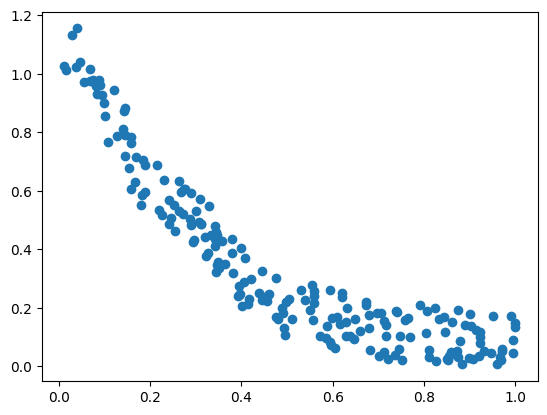

In [256]:
# plot data

plt.scatter(x1, y1)
plt.show();

In [240]:

def ridge_pred(x1,y1, alpha= 1):
    pipeline = Pipeline(steps= [('poly', PolynomialFeatures(degree= 12)), ('ridge', Ridge(alpha= alpha))])
    pipeline.fit(x1,y1)

    return pipeline.predict(x1)

C:\ProgramData\anaconda3\envs\classical\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.04115e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


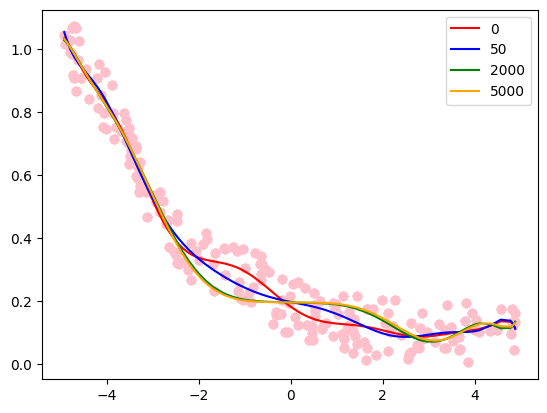

In [251]:
alphaa = [0,50,2000,5000]
c = ['red', 'blue', 'green', 'orange']
for i in zip(alphaa, c):
    pred = ridge_pred(x1,y1,i[0])
    plt.scatter(x1,y1, color= 'pink')
    plt.plot(sorted(x1), pred, color= i[1], label= i[0])
plt.legend()
plt.show();